A seleção de variáveis é um componente muito importante no fluxo de trabalho de um cientista de dados. 

A seleção de recursos é um processo no qual você seleciona automaticamente os recursos em seus dados que mais contribuem para a variável de previsão ou saída em que você está interessado.
<br>
Os modelos tem um risco crescente de overfitting com o aumento do número de colunas, desta forma, perde-se eficácia ao tentar aplicar o modelo aos novos dados.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression, SelectKBest, SelectPercentile

In [2]:
data = pd.read_csv('./dataset2/dataset_completo.csv')
data.head()

Halstead_b  Halstead_d  Halstead_e  Halstead_i  Halstead_l  \
0        1.30        1.30        1.30        1.30        1.30   
1        1.00        1.00        1.00        1.00        1.00   
2        0.10        9.50     2936.77       32.54        0.11   
3        0.07       16.00     3447.89       13.47        0.06   
4        0.12       17.33     5999.58       19.97        0.06   

   Halstead_lOBlank  Halstead_lOCode  Halstead_lOComment  Halstead_n  \
0                 2                2                   2         1.3   
1                 1                1                   1         1.0   
2                 6                1                   0        63.0   
3                 3                0                   0        47.0   
4                 3                0                   0        72.0   

   Halstead_t  ...  McCabe_loc  McCabe_v(g)  SOFTWARE  branchCount  defects  \
0        1.30  ...         1.1          1.4         0          1.4        0   
1        1.00  ...         1.0          1.0         0          1.0        1   
2      163.15  ...        24.0          5.0         0          9.0        0   
3      191.55  ...        20.0          4.0         0          7.0        0   
4      333.31  ...        24.0          6.0         0         11.0        0   

   locCodeAndComment  total_Op  total_Opnd  uniq_Op  uniq_Opnd  
0                  2       1.2         1.2      1.2        1.2  
1                  1       1.0         1.0      1.0        1.0  
2                  0      44.0        19.0     15.0       15.0  
3                  0      31.0        16.0     16.0        8.0  
4                  0      46.0        26.0     16.0       12.0  

[5 rows x 24 columns]

### Selecionando somente as variaveis numéricas para nossa análise!

In [3]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical = list(data.select_dtypes(include=numerics).columns)
data = data[numerical]

Para simplificar a separação dos dados de treino e teste iremos utilizar o train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['defects'], axis=1), data['defects'],
                                                   test_size = 0.3, random_state = 0)
print('Dados de treino {}'.format(X_train.shape))
print('\n')
print('Dados de teste{}'.format(X_test.shape))

Dados de treino (10217, 23)


Dados de teste(4379, 23)


## Mutual information

#### Relação entre as variaveis e a variavel defects.

Se X e Y são independentes, então nenhuma informação sobre Y pode ser obtida conhecendo X ou vice-versa. 
Portanto sua informação mútua é 0.

<br>
Se X é uma função determinística de Y, então podemos determinar X de Y e Y de X com informação mútua 1.

<br>
Quanto menor o valor, menos a variavel descreve  a relação com o Defects!

<br>
A vantagem de usar informações mútuas sobre o F-Test é que ele se dá bem com a relação não linear entre as variáveis de recursos e de Defects.

A seguir é gerado o fator de relação entre variáveis.

In [5]:
mi = mutual_info_classif(X_train.fillna(0), y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi = mi.sort_values(ascending = False)

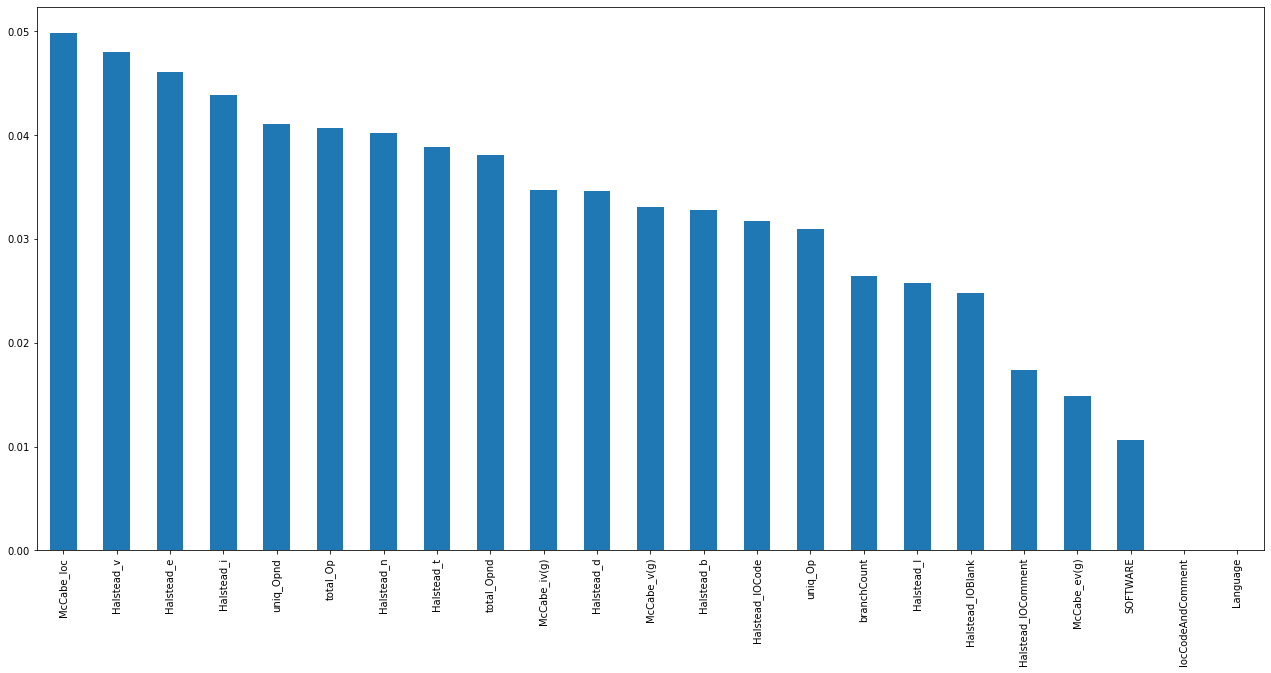

In [6]:
mi.plot.bar(figsize=(22,10));

O código usando a classe SelectKBest da biblioteca feature_selection combinada com o método de máximo coeficiente de informações para selecionar recursos é a seguinte:

In [7]:
sel_ = SelectKBest(mutual_info_classif, k= 10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['Halstead_d', 'Halstead_e', 'Halstead_i', 'Halstead_n', 'Halstead_t',
       'Halstead_v', 'McCabe_iv(g)', 'McCabe_loc', 'total_Op', 'uniq_Opnd'],
      dtype='object')

Abaixo estão as melhores features de acordo com o método Mutual Information

In [8]:
data_mutual_info_classif = data[X_train.columns[sel_.get_support()]]
data_mutual_info_classif['defects'] = data['defects']
data_mutual_info_classif.to_csv('./dataset2/dataset_mutual_info_classif.csv', index=False)
data_mutual_info_classif.head()

C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Halstead_d  Halstead_e  Halstead_i  Halstead_n  Halstead_t  Halstead_v  \
0        1.30        1.30        1.30         1.3        1.30        1.30   
1        1.00        1.00        1.00         1.0        1.00        1.00   
2        9.50     2936.77       32.54        63.0      163.15      309.13   
3       16.00     3447.89       13.47        47.0      191.55      215.49   
4       17.33     5999.58       19.97        72.0      333.31      346.13   

   McCabe_iv(g)  McCabe_loc  total_Op  uniq_Opnd  defects  
0           1.4         1.1       1.2        1.2        0  
1           1.0         1.0       1.0        1.0        1  
2           3.0        24.0      44.0       15.0        0  
3           2.0        20.0      31.0        8.0        0  
4           2.0        24.0      46.0       12.0        0

### Aplicando o método de Regressao (mutual_info_regression)


In [9]:
# Selecionando somente as variaveis numericas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical = list(data.select_dtypes(include=numerics).columns)
data = data[numerical]

In [10]:
# Separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(data.drop(['defects'], axis=1), data['defects'],
                                                   test_size = 0.3, random_state = 0)

#### Encontrando o Mutual Information com Regressão!

In [11]:
mi = mutual_info_regression(X_train.fillna(0), y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)[:10].index

Index(['Halstead_v', 'McCabe_loc', 'Halstead_i', 'Halstead_e', 'Halstead_t',
       'total_Opnd', 'uniq_Opnd', 'total_Op', 'Halstead_d', 'Halstead_n'],
      dtype='object')

In [12]:
data_mutual_info_regression = data[mi.sort_values(ascending=False)[:10].index]
data_mutual_info_regression['defects'] = data['defects']
data_mutual_info_regression.to_csv('./dataset2/data_mutual_info_regression.csv', index=False)

C:\Users\Camila\Anaconda3\envs\pdi\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Halstead_v  McCabe_loc  Halstead_i  Halstead_e  Halstead_t  total_Opnd  \
0            1.30         1.1        1.30        1.30        1.30         1.2   
1            1.00         1.0        1.00        1.00        1.00         1.0   
2          309.13        24.0       32.54     2936.77      163.15        19.0   
3          215.49        20.0       13.47     3447.89      191.55        16.0   
4          346.13        24.0       19.97     5999.58      333.31        26.0   
5          346.13        24.0       19.97     5999.58      333.31        26.0   
6           34.87         7.0       17.43       69.74        3.87         5.0   
7           94.01        12.0       14.62      604.36       33.58         9.0   
8          548.83        25.0       38.51     7820.87      434.49        38.0   
9         1362.41        46.0       61.10    30377.95     1687.66       110.0   
10         856.15        34.0       41.24    17773.08      987.39        59.0   
11         143.06        10.0       15.90     1287.55       71.53        16.0   
12         770.38        23.0       27.40    21659.58     1203.31        43.0   
13         474.97        23.0       17.45    12929.85      718.32        35.0   
14        1303.73        31.0       47.41    35852.60     1991.81        70.0   
15         655.13        24.0       43.10     9958.00      553.22        40.0   
16         271.03        13.0       29.61     2480.95      137.83        17.0   
17          55.51         6.0       13.88      222.03       12.33         5.0   
18         745.68        33.0       64.01     8684.99      482.50        66.0   
19          55.51         6.0       13.88      222.03       12.33         5.0   
20         105.49         7.0        8.79     1265.83       70.32        12.0   
21          48.43         3.0       11.07      211.89       11.77         5.0   
22         110.41         7.0       22.65      538.26       29.90        13.0   
23         170.97         9.0       12.09     2417.96      134.33        18.0   
24         215.22        11.0       14.67     3156.61      175.37        22.0   
25          39.00         4.0       13.00      117.00        6.50         6.0   
26          19.65         3.0        7.86       49.13        2.73         2.0   
27         370.17        16.0       18.87     7260.95      403.39        34.0   
28        3327.01        65.0       79.18   139798.54     7766.59       230.0   
29        5580.79       177.0      101.81   305928.62    16996.03       268.0   
...           ...         ...         ...         ...         ...         ...   
14566       85.95        11.0       14.33      515.71       28.65         8.0   
14567        8.00         3.0        5.33       12.00        0.67         1.0   
14568      296.13        10.0       13.71     6396.36      355.35        27.0   
14569      454.95        13.0       16.66    12420.23      690.01        39.0   
14570      108.42         7.0       13.80      851.86       47.33        10.0   
14571       62.91         5.0       13.11      301.96       16.78         6.0   
14572      568.69        17.0       44.60     7250.82      402.82        51.0   
14573      917.77        29.0       26.43    31867.04     1770.39        75.0   
14574      172.88         8.0       20.34     1469.46       81.64        17.0   
14575       68.11         5.0        4.54     1021.71       56.76         6.0   
14576      605.41        23.0       19.57    18729.81     1040.55        55.0   
14577     4702.85       103.0       42.16   524548.83    29141.60       290.0   
14578      279.69        15.0       16.95     4614.93      256.39        22.0   
14579     1397.48        38.0       49.32    39595.17     2199.73       102.0   
14580       53.77         5.0       10.75      268.87       14.94         5.0   
14581     1341.28        36.0       33.88    53092.15     2949.56        95.0   
14582      164.09        10.0        8.52     3158.72      175.48        14.0   
14583       85.11         7.0        6

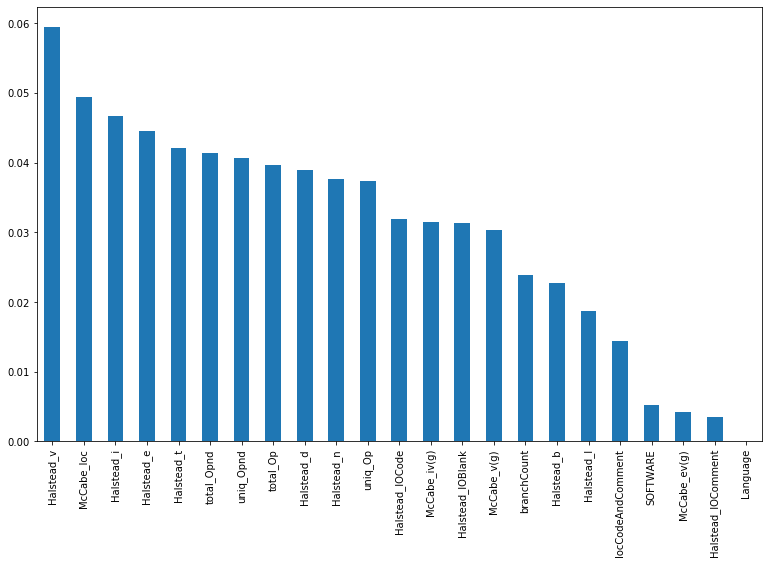

In [13]:
mi.sort_values(ascending=False).plot.bar(figsize = (13,8));

# Regressão

In [14]:
from sklearn.feature_selection import f_classif, f_regression

# Univariada ROC-AUC ou MSE

* Primeiramente, cria-se uma árvore de decisao para cada variavel.
* Realiza a predição com a árvore de decisao mencionada.
* Ranqueia os itens de acordo com a metrica ROC-AUC ou MSE.
* Seleciona os mais altos índices das variaveis. 

In [15]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

In [16]:
data = pd.read_csv('./dataset2/dataset_completo.csv')
data.head()

# Selecionando somente as variaveis numericas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical = list(data.select_dtypes(include=numerics).columns)
data = data[numerical]

In [17]:
# Separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(data.drop(['defects'], axis=1), data['defects'],
                                                   test_size = 0.3, random_state = 0)

Criação do laço para preencher a variavel roc_values com as prediçoes da árvore de decisão!

In [18]:
roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

Ordenando as colunas em roc_values para facilitar a visualização

In [19]:
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending = False)[0:10]

McCabe_loc          0.694282
uniq_Op             0.678897
uniq_Opnd           0.678535
McCabe_iv(g)        0.678238
branchCount         0.671742
McCabe_v(g)         0.671145
Halstead_l          0.663235
Halstead_lOCode     0.658135
Halstead_lOBlank    0.654683
total_Opnd          0.644578
dtype: float64

Pode-se notar que diversas variaveis estão com o mesmo score 0.6

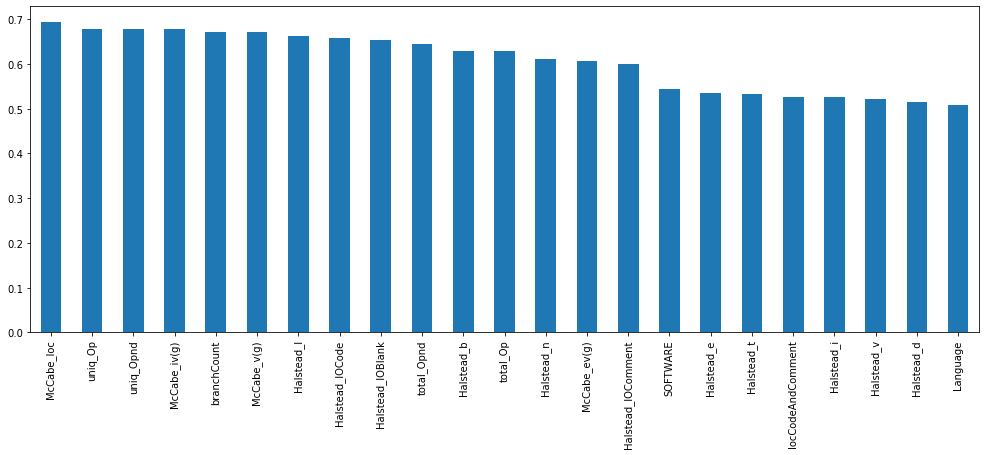

In [20]:
roc_values.sort_values(ascending = False).plot.bar(figsize = (17,6));

Verificando quantas variaveis estão acima do threshold de 0.6

In [21]:
roc_values[roc_values > 0.6]

Halstead_b            0.629989
Halstead_l            0.663235
Halstead_lOBlank      0.654683
Halstead_lOCode       0.658135
Halstead_lOComment    0.600207
Halstead_n            0.611074
McCabe_ev(g)          0.606019
McCabe_iv(g)          0.678238
McCabe_loc            0.694282
McCabe_v(g)           0.671145
branchCount           0.671742
total_Op              0.629058
total_Opnd            0.644578
uniq_Op               0.678897
uniq_Opnd             0.678535
dtype: float64

### Exemplo com o caso de Regressão

#### Para o caso  de regressão, quanto menor o valor de MSE, melhor!!!
* Metodo útil quando se esta trabalhando com datasets enormes!

* Experimente valores diferentes para as diversas opções de parâmetros e assim verificar quais funcionam melhor para uma tarefa de machine learning.

* A seleção de variáveis é uma etapa crítica de um fluxo de trabalho no aprendizado de máquina. O cientista de dados precisa executar várias iterações para otimizar os dados e modelos.


In [22]:
data = pd.read_csv('./dataset2/dataset_completo.csv')

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical = list(data.select_dtypes(include=numerics).columns)
data = data[numerical]

In [23]:
# Separando os dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(data.drop(['defects'], axis=1), data['defects'],
                                                   test_size = 0.3, random_state = 0)

In [24]:
# Criacao do laco para gerar o classificador de arvore de decisao (MSE)
mse_values = []
for feature in X_train.columns:
    clf = DecisionTreeRegressor()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict(X_test[feature].fillna(0).to_frame())
    mse_values.append(mean_squared_error(y_test, y_scored))

In [25]:
mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending = False, inplace = True)

In [26]:
mse_values[0:10]

Halstead_e           0.230749
Halstead_t           0.229860
Halstead_i           0.209888
Halstead_v           0.201122
Halstead_d           0.186532
Halstead_n           0.150841
total_Op             0.147550
locCodeAndComment    0.143780
Language             0.143408
total_Opnd           0.143216
dtype: float64

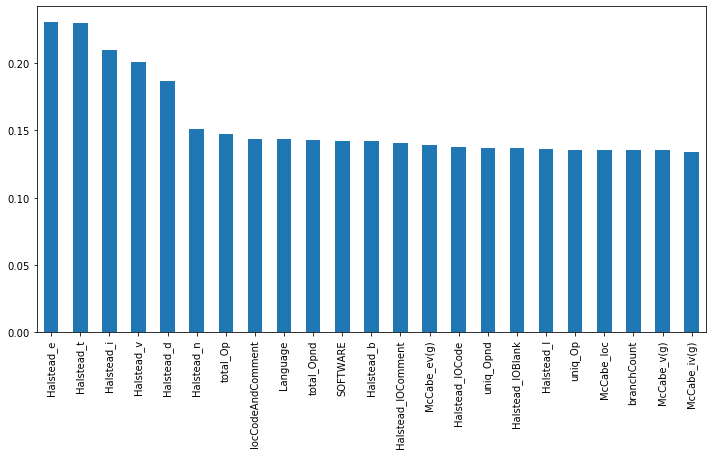

In [27]:
mse_values.plot.bar(figsize = (12,6));

## Arvore de decisão 

In [28]:
from sklearn import tree

In [29]:
classes = data_mutual_info_classif['defects']

In [30]:
del data_mutual_info_classif['defects']

In [31]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data_mutual_info_classif, classes)

[Text(182.05309421485734, 214.722, 'X[7] <= 40.5\nentropy = 0.289\nsamples = 14596\nvalue = [12041, 2555]'),
 Text(81.31405458127044, 209.286, 'X[7] <= 11.5\nentropy = 0.201\nsamples = 10885\nvalue = [9652, 1233]'),
 Text(21.738907503711697, 203.85, 'X[7] <= 5.5\nentropy = 0.117\nsamples = 4636\nvalue = [4348, 288]'),
 Text(5.663524123999059, 198.414, 'X[4] <= 0.985\nentropy = 0.071\nsamples = 2361\nvalue = [2274, 87]'),
 Text(1.4138891277716028, 192.978, 'X[7] <= 2.5\nentropy = 0.033\nsamples = 1086\nvalue = [1068, 18]'),
 Text(0.5562842469921061, 187.542, 'X[3] <= 3.5\nentropy = 0.005\nsamples = 399\nvalue = [398, 1]'),
 Text(0.37085616466140403, 182.106, 'X[4] <= 0.13\nentropy = 0.02\nsamples = 99\nvalue = [98, 1]'),
 Text(0.18542808233070202, 176.67000000000002, 'entropy = 0.0\nsamples = 77\nvalue = [77, 0]'),
 Text(0.5562842469921061, 176.67000000000002, 'entropy = 0.087\nsamples = 22\nvalue = [21, 1]'),
 Text(0.7417123293228081, 182.106, 'entropy = 0.0\nsamples = 300\nvalue = [30

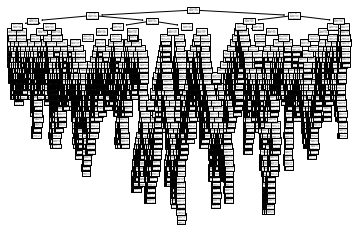

In [32]:
tree.plot_tree(clf.fit(data_mutual_info_classif, classes))

In [33]:
import graphviz
import os

In [34]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data)
graph.render("Software Defective")

'Software Defective.pdf'

In [36]:
graph =dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=np.array(data_mutual_info_classif.columns),  
                      class_names=np.array(['OK', 'Defeito']),  
                      filled=True, rounded=True,  
                      special_characters=True)  
dot_data
graph = graphviz.Source(dot_data)  
graph.render("arvore")

'arvore.pdf'

In [37]:
graph

<div style='text-align:left;width:40%;float:left;'>
    <a href="./3.1_Análise_Exploratória_dos_Dados_McCabe.ipynb">Anterior</a>
</div>
<div style='text-align:right;width:30%; float:right'>
    <a href="./comparacao.ipynb">Próximo</a>
</div>